# Applying SVM Machine Learning Model From Scratch

Description for the steps in this Notebook is available on https://medium.com/@gayani.nisansala.blog/applying-svm-machine-learning-model-from-scratch-23ea0034e882

### Discovering the Dataset








In [1]:
# importing numpy and pandas libraries
import pandas as pd
import numpy as np

#### mounting the google drive to google colab
from google.colab import drive
drive.mount("/content/gdrive")

In [2]:
# read the csv file
banking_dataset = pd.read_csv("banking.csv")
banking_dataset.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
# Gives a descriptive statistics about the banking_dataset dataframe
banking_dataset.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [4]:
# get the numerical column names of the dataset
banking_dataset.select_dtypes(include=[np.number]).columns


Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [5]:
# get the norminal column names of the dataset
banking_dataset.select_dtypes(exclude=[np.number]).columns


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [6]:
#drop the 'duration' attribute
banking_dataset.drop(['duration'],axis=1,inplace=True)

In [7]:
banking_dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


### Handling Missing Values 
*   There are no missing values exist in the dataset.



In [8]:
banking_dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

### Handling Outliers
Outlier means an unusual data point that can be significantly identifies from the rest of the sample.




In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

##### 'age' feature

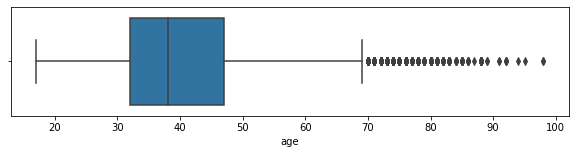

In [10]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,2))
sns.boxplot(banking_dataset['age'])
plt.show()

##### 'emp_var_rate' feature

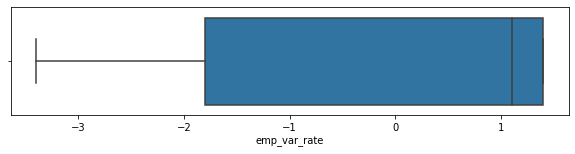

In [11]:
plt.figure(figsize=(10,2))
sns.boxplot(banking_dataset['emp_var_rate'])
plt.show()

##### 'cons_price_idx' feature

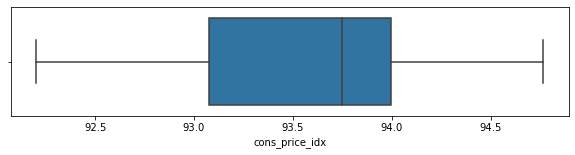

In [12]:
plt.figure(figsize=(10,2))
sns.boxplot(banking_dataset['cons_price_idx'])
plt.show()

##### 'cons_conf_idx' feature

*   This feature is having outliers





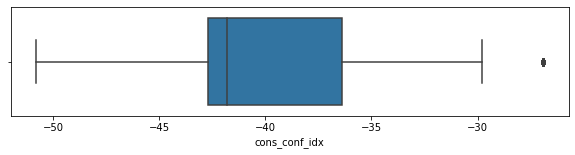

In [13]:
plt.figure(figsize=(10,2))
sns.boxplot(banking_dataset['cons_conf_idx'])
plt.show()

##### 'euribor3m' feature

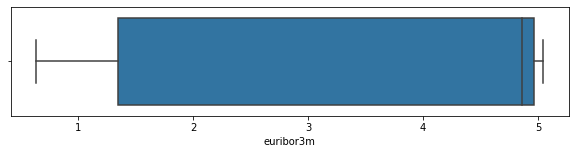

In [14]:
plt.figure(figsize=(10,2))
sns.boxplot(banking_dataset['euribor3m'])
plt.show()

##### 'nr_employed' feature

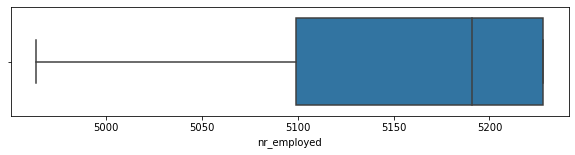

In [15]:
plt.figure(figsize=(10,2))
sns.boxplot(banking_dataset['nr_employed'])
plt.show()

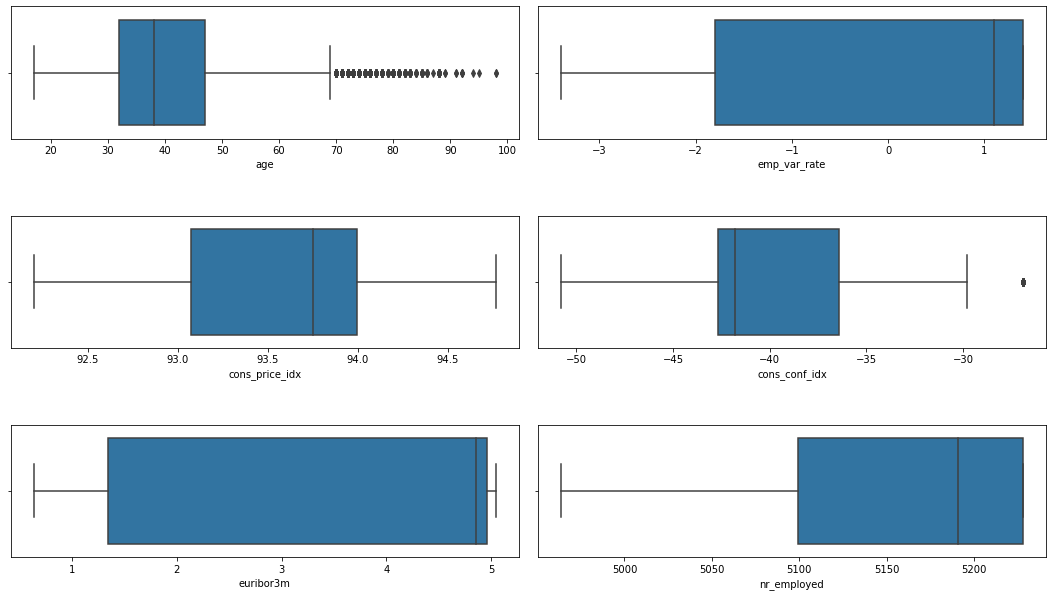

In [16]:
# Visualizing box plots of all the numerical features (before removing outliers)
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(15,8))
plt.subplot(3,2,1)
plt.tight_layout(h_pad=6)
sns.boxplot(banking_dataset['age'])

plt.subplot(3,2,2)
sns.boxplot(banking_dataset['emp_var_rate'])

plt.subplot(3,2,3)
sns.boxplot(banking_dataset['cons_price_idx'])

plt.subplot(3,2,4)
sns.boxplot(banking_dataset['cons_conf_idx'])

plt.subplot(3,2,5)
sns.boxplot(banking_dataset['euribor3m'])

plt.subplot(3,2,6)
sns.boxplot(banking_dataset['nr_employed'])

plt.show()

By observing the above box plots, we can see that features such as 'age' and 'cons_conf_idx' are having outliers. Those outliers need to be handled

In [17]:
# define the min and max values of data spread to filter out outliers
min_value = banking_dataset.quantile(0.05)
max_value = banking_dataset.quantile(0.95)

In [18]:
# display the shape of the dataframes which includes the data within the range less than minimum quantile or greater than the maximum quantile.
eligible_outliers_cons_conf_idx = banking_dataset[(banking_dataset['cons_conf_idx']<min_value['cons_conf_idx']) | (banking_dataset['cons_conf_idx']>max_value['cons_conf_idx'])].shape

print(f"shape of the dataframes which includes all outliers need to be removed in features --> cons_conf_idx : {eligible_outliers_cons_conf_idx}")

shape of the dataframes which includes all outliers need to be removed in features --> cons_conf_idx : (2627, 20)


In [19]:
banking_dataset.shape

(41188, 20)

In [20]:
# removing outliers
df_outlier_handling = banking_dataset[(banking_dataset['cons_conf_idx']>=min_value['cons_conf_idx']) & (banking_dataset['cons_conf_idx']<=max_value['cons_conf_idx'])]


In [21]:
df_outlier_handling.shape

(38561, 20)

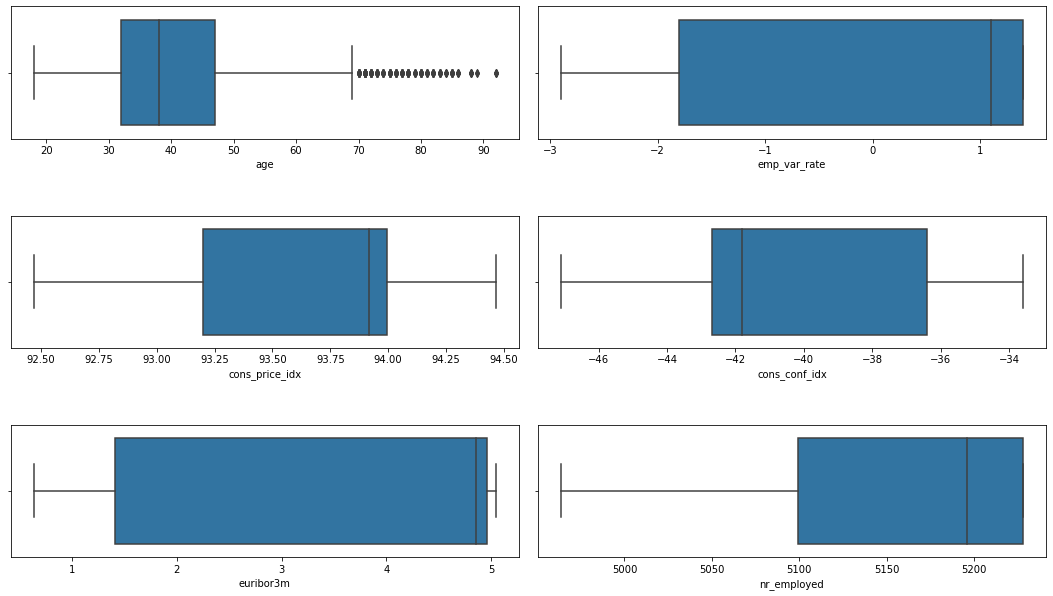

In [22]:
# Visualizing box plots of all the numerical features (after removing outliers)
import warnings
warnings.filterwarnings("ignore")
banking_dataset = df_outlier_handling.copy()
plt.figure(figsize=(15,8))
plt.subplot(3,2,1)
plt.tight_layout(h_pad=6)
sns.boxplot(banking_dataset['age'])

plt.subplot(3,2,2)
sns.boxplot(banking_dataset['emp_var_rate'])

plt.subplot(3,2,3)
sns.boxplot(banking_dataset['cons_price_idx'])

plt.subplot(3,2,4)
sns.boxplot(banking_dataset['cons_conf_idx'])

plt.subplot(3,2,5)
sns.boxplot(banking_dataset['euribor3m'])

plt.subplot(3,2,6)
sns.boxplot(banking_dataset['nr_employed'])

plt.show()

### Data Transformations


In [23]:
import scipy.stats as stats

#function to display probability plots for each feature available in the dataframe
def display_probplots_x(df_without_outliers):
  plt.figure(figsize=(15,7))
  plt.tight_layout(h_pad=6)
  plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

  ax1=plt.subplot(3,2,1)
  stats.probplot(df_without_outliers['age'], dist="norm", plot=plt)
  ax1.set_title("age")

  ax2=plt.subplot(3,2,2)
  stats.probplot(df_without_outliers['emp_var_rate'], dist="norm", plot=plt)
  ax2.set_title('emp_var_rate')

  ax3=plt.subplot(3,2,3)
  stats.probplot(df_without_outliers['cons_price_idx'], dist="norm", plot=plt)
  ax3.set_title('cons_price_idx')

  ax4=plt.subplot(3,2,4)
  stats.probplot(df_without_outliers['cons_conf_idx'], dist="norm", plot=plt)
  ax4.set_title('cons_conf_idx')
  
  ax5=plt.subplot(3,2,5)
  stats.probplot(df_without_outliers['euribor3m'], dist="norm", plot=plt)
  ax5.set_title('euribor3m')

  ax6=plt.subplot(3,2,6)
  stats.probplot(df_without_outliers['nr_employed'], dist="norm", plot=plt)
  ax6.set_title('nr_employed')

  plt.show()

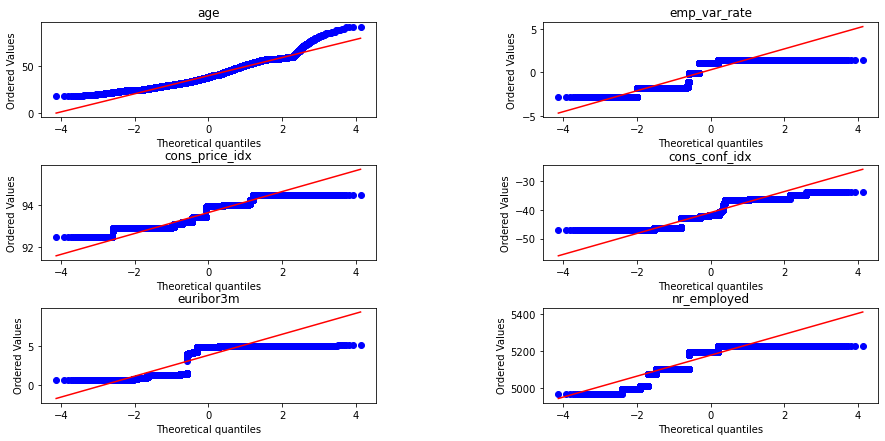

In [24]:
display_probplots_x(df_outlier_handling)

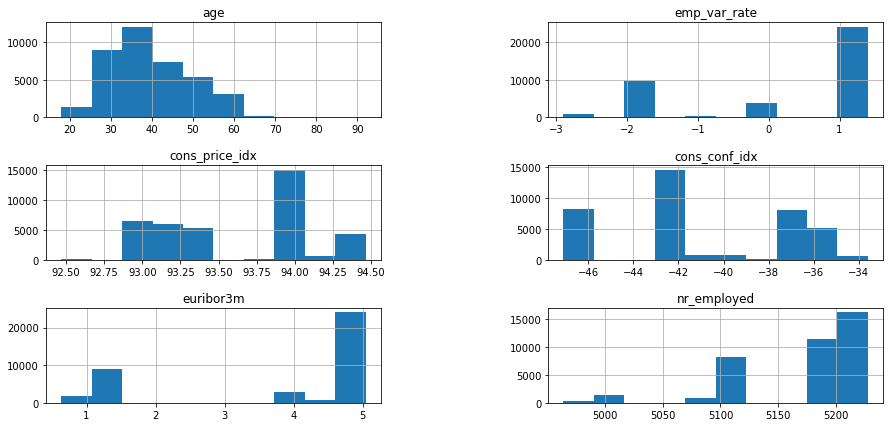

In [25]:
# Visualizing histograms of ‘df_outlier_handling’ dataframe (before transformations)
plt.figure(figsize=(15,7))
plt.tight_layout(h_pad=6)
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

ax1=plt.subplot(3,2,1)
df_outlier_handling['age'].hist()
ax1.set_title("age")

ax2=plt.subplot(3,2,2)
df_outlier_handling['emp_var_rate'].hist()
ax2.set_title('emp_var_rate')

ax3=plt.subplot(3,2,3)
df_outlier_handling['cons_price_idx'].hist()
ax3.set_title('cons_price_idx')

ax4=plt.subplot(3,2,4)
df_outlier_handling['cons_conf_idx'].hist()
ax4.set_title('cons_conf_idx')
  
ax5=plt.subplot(3,2,5)
df_outlier_handling['euribor3m'].hist()
ax5.set_title('euribor3m')

ax6=plt.subplot(3,2,6)
df_outlier_handling['nr_employed'].hist()
ax6.set_title('nr_employed')

plt.show()

In [26]:
from sklearn.preprocessing import FunctionTransformer

def power_transformer(df_without_outliers):
  power_transformer = FunctionTransformer(lambda x: x**3)

  df_without_outliers['emp_var_rate'] = power_transformer.transform(df_without_outliers['emp_var_rate'])
  df_without_outliers['euribor3m'] = power_transformer.transform(df_without_outliers['euribor3m'])
  df_without_outliers['nr_employed'] = power_transformer.transform(df_without_outliers['nr_employed'])

  return df_without_outliers

In [27]:
df_transformed=power_transformer(df_outlier_handling)

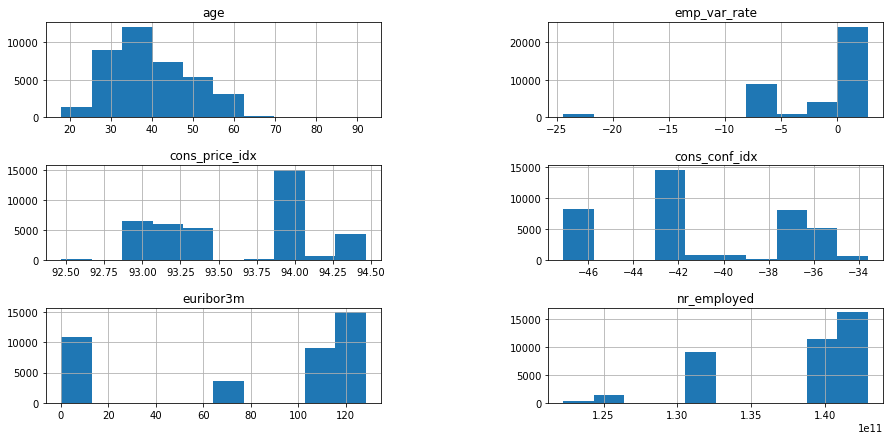

In [28]:
# Visualizing histograms of ‘df_outlier_handling’ dataframe (after transformations)
plt.figure(figsize=(15,7))
plt.tight_layout(h_pad=6)
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

ax1=plt.subplot(3,2,1)
df_transformed['age'].hist()
ax1.set_title("age")

ax2=plt.subplot(3,2,2)
df_transformed['emp_var_rate'].hist()
ax2.set_title('emp_var_rate')

ax3=plt.subplot(3,2,3)
df_transformed['cons_price_idx'].hist()
ax3.set_title('cons_price_idx')

ax4=plt.subplot(3,2,4)
df_transformed['cons_conf_idx'].hist()
ax4.set_title('cons_conf_idx')
  
ax5=plt.subplot(3,2,5)
df_transformed['euribor3m'].hist()
ax5.set_title('euribor3m')

ax6=plt.subplot(3,2,6)
df_transformed['nr_employed'].hist()
ax6.set_title('nr_employed')

plt.show()

### Data Encoding & Data Discretization

**campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)**


*   Although this  'campaign' feature represents numerical values it contains categorical representation


**pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)**
*   Although this  'pdays' feature represents numerical values it contains categorical representation.

**previous: number of contacts performed before this campaign and for this client (numeric)**
*   Although this  'previous' feature represents numerical values it contains categorical representation. 


Above three features are useful features when comes to predicting y(y -if the client will subscribe a term deposit or not). This three features are convey more categorical meaning rather numerical meaning.


* In the 'campaign' feature varies from1 to 56. This feature can be discretized.
* 'age' feature also has to be discretized.





In [29]:
for column in banking_dataset.select_dtypes(exclude=[np.number]).columns:
  print(f"{column.upper()} : {len(df_transformed[column].value_counts())}")


JOB : 12
MARITAL : 4
EDUCATION : 8
DEFAULT : 3
HOUSING : 3
LOAN : 3
CONTACT : 2
MONTH : 10
DAY_OF_WEEK : 5
POUTCOME : 3


In [30]:
distinct_pdays_len = len(df_transformed['pdays'].value_counts())
distinct_previous_len = len(df_transformed['previous'].value_counts())

print(f"distinct values of features -> 'pdays' : {distinct_pdays_len} 'previous' : {distinct_previous_len}")

distinct values of features -> 'pdays' : 25 'previous' : 7


In [31]:
discretize_df=df_transformed.copy()

In [32]:
# discretizing the ‘age’ feature into 10 bins
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform') 
discretizer.fit(discretize_df['age'].values.reshape(-1,1))
discretize_df['age'] = discretizer.transform(discretize_df['age'].values.reshape(-1,1))
discretize_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,3.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,1,999,0,nonexistent,2.744,93.444,-36.1,122.245484,1.428998e+11,0
1,4.0,technician,married,unknown,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-0.001,93.200,-42.0,65.013301,1.402676e+11,0
2,1.0,management,single,university.degree,no,yes,no,cellular,jun,thu,3,6,2,success,-4.913,94.055,-39.8,0.387420,1.243711e+11,1
3,2.0,services,married,high.school,no,no,no,cellular,apr,fri,2,999,0,nonexistent,-5.832,93.075,-47.1,2.773505,1.325808e+11,0
5,1.0,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,8,999,0,nonexistent,2.744,93.918,-42.7,122.097756,1.428998e+11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41182,0.0,admin.,married,high.school,no,yes,no,cellular,may,thu,4,999,1,failure,-5.832,92.893,-46.2,2.029089,1.325808e+11,0
41183,5.0,retired,married,high.school,unknown,no,yes,telephone,jun,thu,1,999,0,nonexistent,2.744,94.465,-41.8,115.216934,1.428998e+11,0
41184,1.0,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,2,999,0,nonexistent,1.331,93.994,-36.4,114.791256,1.398792e+11,0
41185,3.0,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,3,999,0,nonexistent,1.331,93.994,-36.4,114.578811,1.398792e+11,0


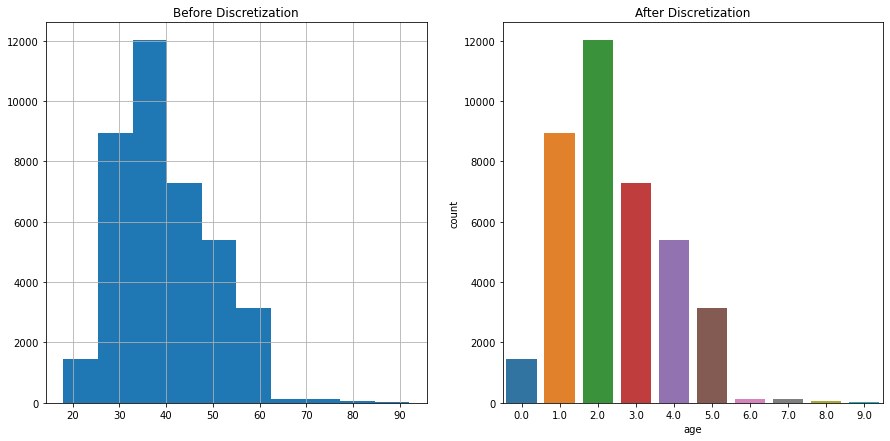

In [33]:
# Visualizing the details of before and after discretizing the ‘age’ feature
plt.figure(figsize=(15,7))
plt.tight_layout(h_pad=6)

ax1=plt.subplot(1,2,1)
df_transformed['age'].hist()
ax1.set_title("Before Discretization")

ax1=plt.subplot(1,2,2)
sns.countplot(discretize_df['age'])
ax1.set_title("After Discretization")

plt.show()

In [34]:
# discretizing the ‘campaign’ feature into 10 bins.
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform') 
discretizer.fit(discretize_df['campaign'].values.reshape(-1,1))
discretize_df['campaign'] = discretizer.transform(discretize_df['campaign'].values.reshape(-1,1))
discretize_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,3.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,0.0,999,0,nonexistent,2.744,93.444,-36.1,122.245484,1.428998e+11,0
1,4.0,technician,married,unknown,no,no,no,cellular,nov,fri,0.0,999,0,nonexistent,-0.001,93.200,-42.0,65.013301,1.402676e+11,0
2,1.0,management,single,university.degree,no,yes,no,cellular,jun,thu,0.0,6,2,success,-4.913,94.055,-39.8,0.387420,1.243711e+11,1
3,2.0,services,married,high.school,no,no,no,cellular,apr,fri,0.0,999,0,nonexistent,-5.832,93.075,-47.1,2.773505,1.325808e+11,0
5,1.0,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,1.0,999,0,nonexistent,2.744,93.918,-42.7,122.097756,1.428998e+11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41182,0.0,admin.,married,high.school,no,yes,no,cellular,may,thu,0.0,999,1,failure,-5.832,92.893,-46.2,2.029089,1.325808e+11,0
41183,5.0,retired,married,high.school,unknown,no,yes,telephone,jun,thu,0.0,999,0,nonexistent,2.744,94.465,-41.8,115.216934,1.428998e+11,0
41184,1.0,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,0.0,999,0,nonexistent,1.331,93.994,-36.4,114.791256,1.398792e+11,0
41185,3.0,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,0.0,999,0,nonexistent,1.331,93.994,-36.4,114.578811,1.398792e+11,0


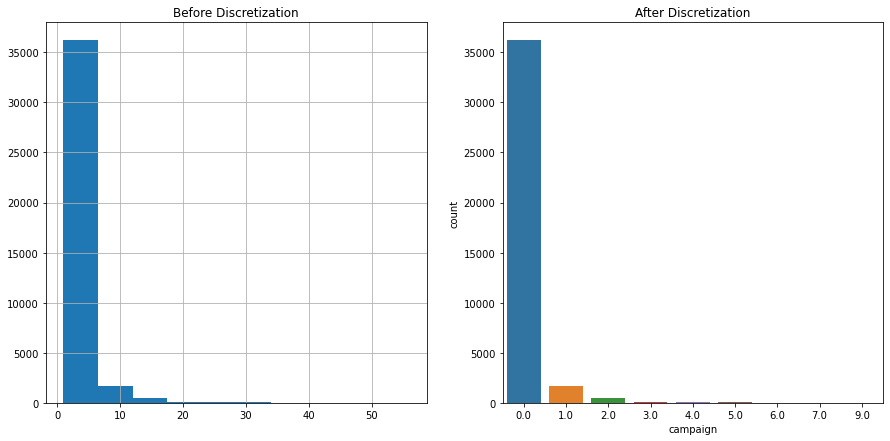

In [35]:
# Visualizing the details of before and after discretizing the ‘campaign’ feature
plt.figure(figsize=(15,7))
plt.tight_layout(h_pad=6)

ax1=plt.subplot(1,2,1)
df_transformed['campaign'].hist()
ax1.set_title("Before Discretization")

ax1=plt.subplot(1,2,2)
sns.countplot(discretize_df['campaign'])
ax1.set_title("After Discretization")

plt.show()

In [36]:
encoded_df=discretize_df.copy()

In [37]:
# Changing data type to 'category'
encoded_df['job']=encoded_df['job'].astype('category')
encoded_df['marital']=encoded_df['marital'].astype('category')
encoded_df['education']=encoded_df['education'].astype('category')
encoded_df['default']=encoded_df['default'].astype('category')
encoded_df['housing']=encoded_df['housing'].astype('category')
encoded_df['loan']=encoded_df['loan'].astype('category')
encoded_df['contact']=encoded_df['contact'].astype('category')
encoded_df['month']=encoded_df['month'].astype('category')
encoded_df['day_of_week']=encoded_df['day_of_week'].astype('category')
encoded_df['poutcome']=encoded_df['poutcome'].astype('category')
encoded_df['campaign'] =encoded_df['campaign'].astype('category')
encoded_df['pdays'] =encoded_df['pdays'].astype('category')
encoded_df['previous'] =encoded_df['previous'].astype('category')
encoded_df['age'] =encoded_df['age'].astype('category')

In [38]:
from sklearn.preprocessing import LabelEncoder

# Applying label encoding
label_encoder = LabelEncoder()
encoded_df['job'] = label_encoder.fit_transform(encoded_df['job'])
encoded_df['education'] = label_encoder.fit_transform(encoded_df['education'])
encoded_df['marital'] = label_encoder.fit_transform(encoded_df['marital'])
encoded_df['default'] = label_encoder.fit_transform(encoded_df['default'])
encoded_df['housing'] = label_encoder.fit_transform(encoded_df['housing'])
encoded_df['loan'] = label_encoder.fit_transform(encoded_df['loan'])
encoded_df['contact'] = label_encoder.fit_transform(encoded_df['contact'])
encoded_df['month'] = label_encoder.fit_transform(encoded_df['month'])
encoded_df['day_of_week'] = label_encoder.fit_transform(encoded_df['day_of_week'])
encoded_df['poutcome'] = label_encoder.fit_transform(encoded_df['poutcome'])

# create dummy variables for each norminal value in 'pdays' feature
encoded_df = pd.get_dummies(encoded_df,columns=['pdays'])


### Identify significant and independent features

In [39]:
final_encoded_df=encoded_df.copy()

<AxesSubplot:>

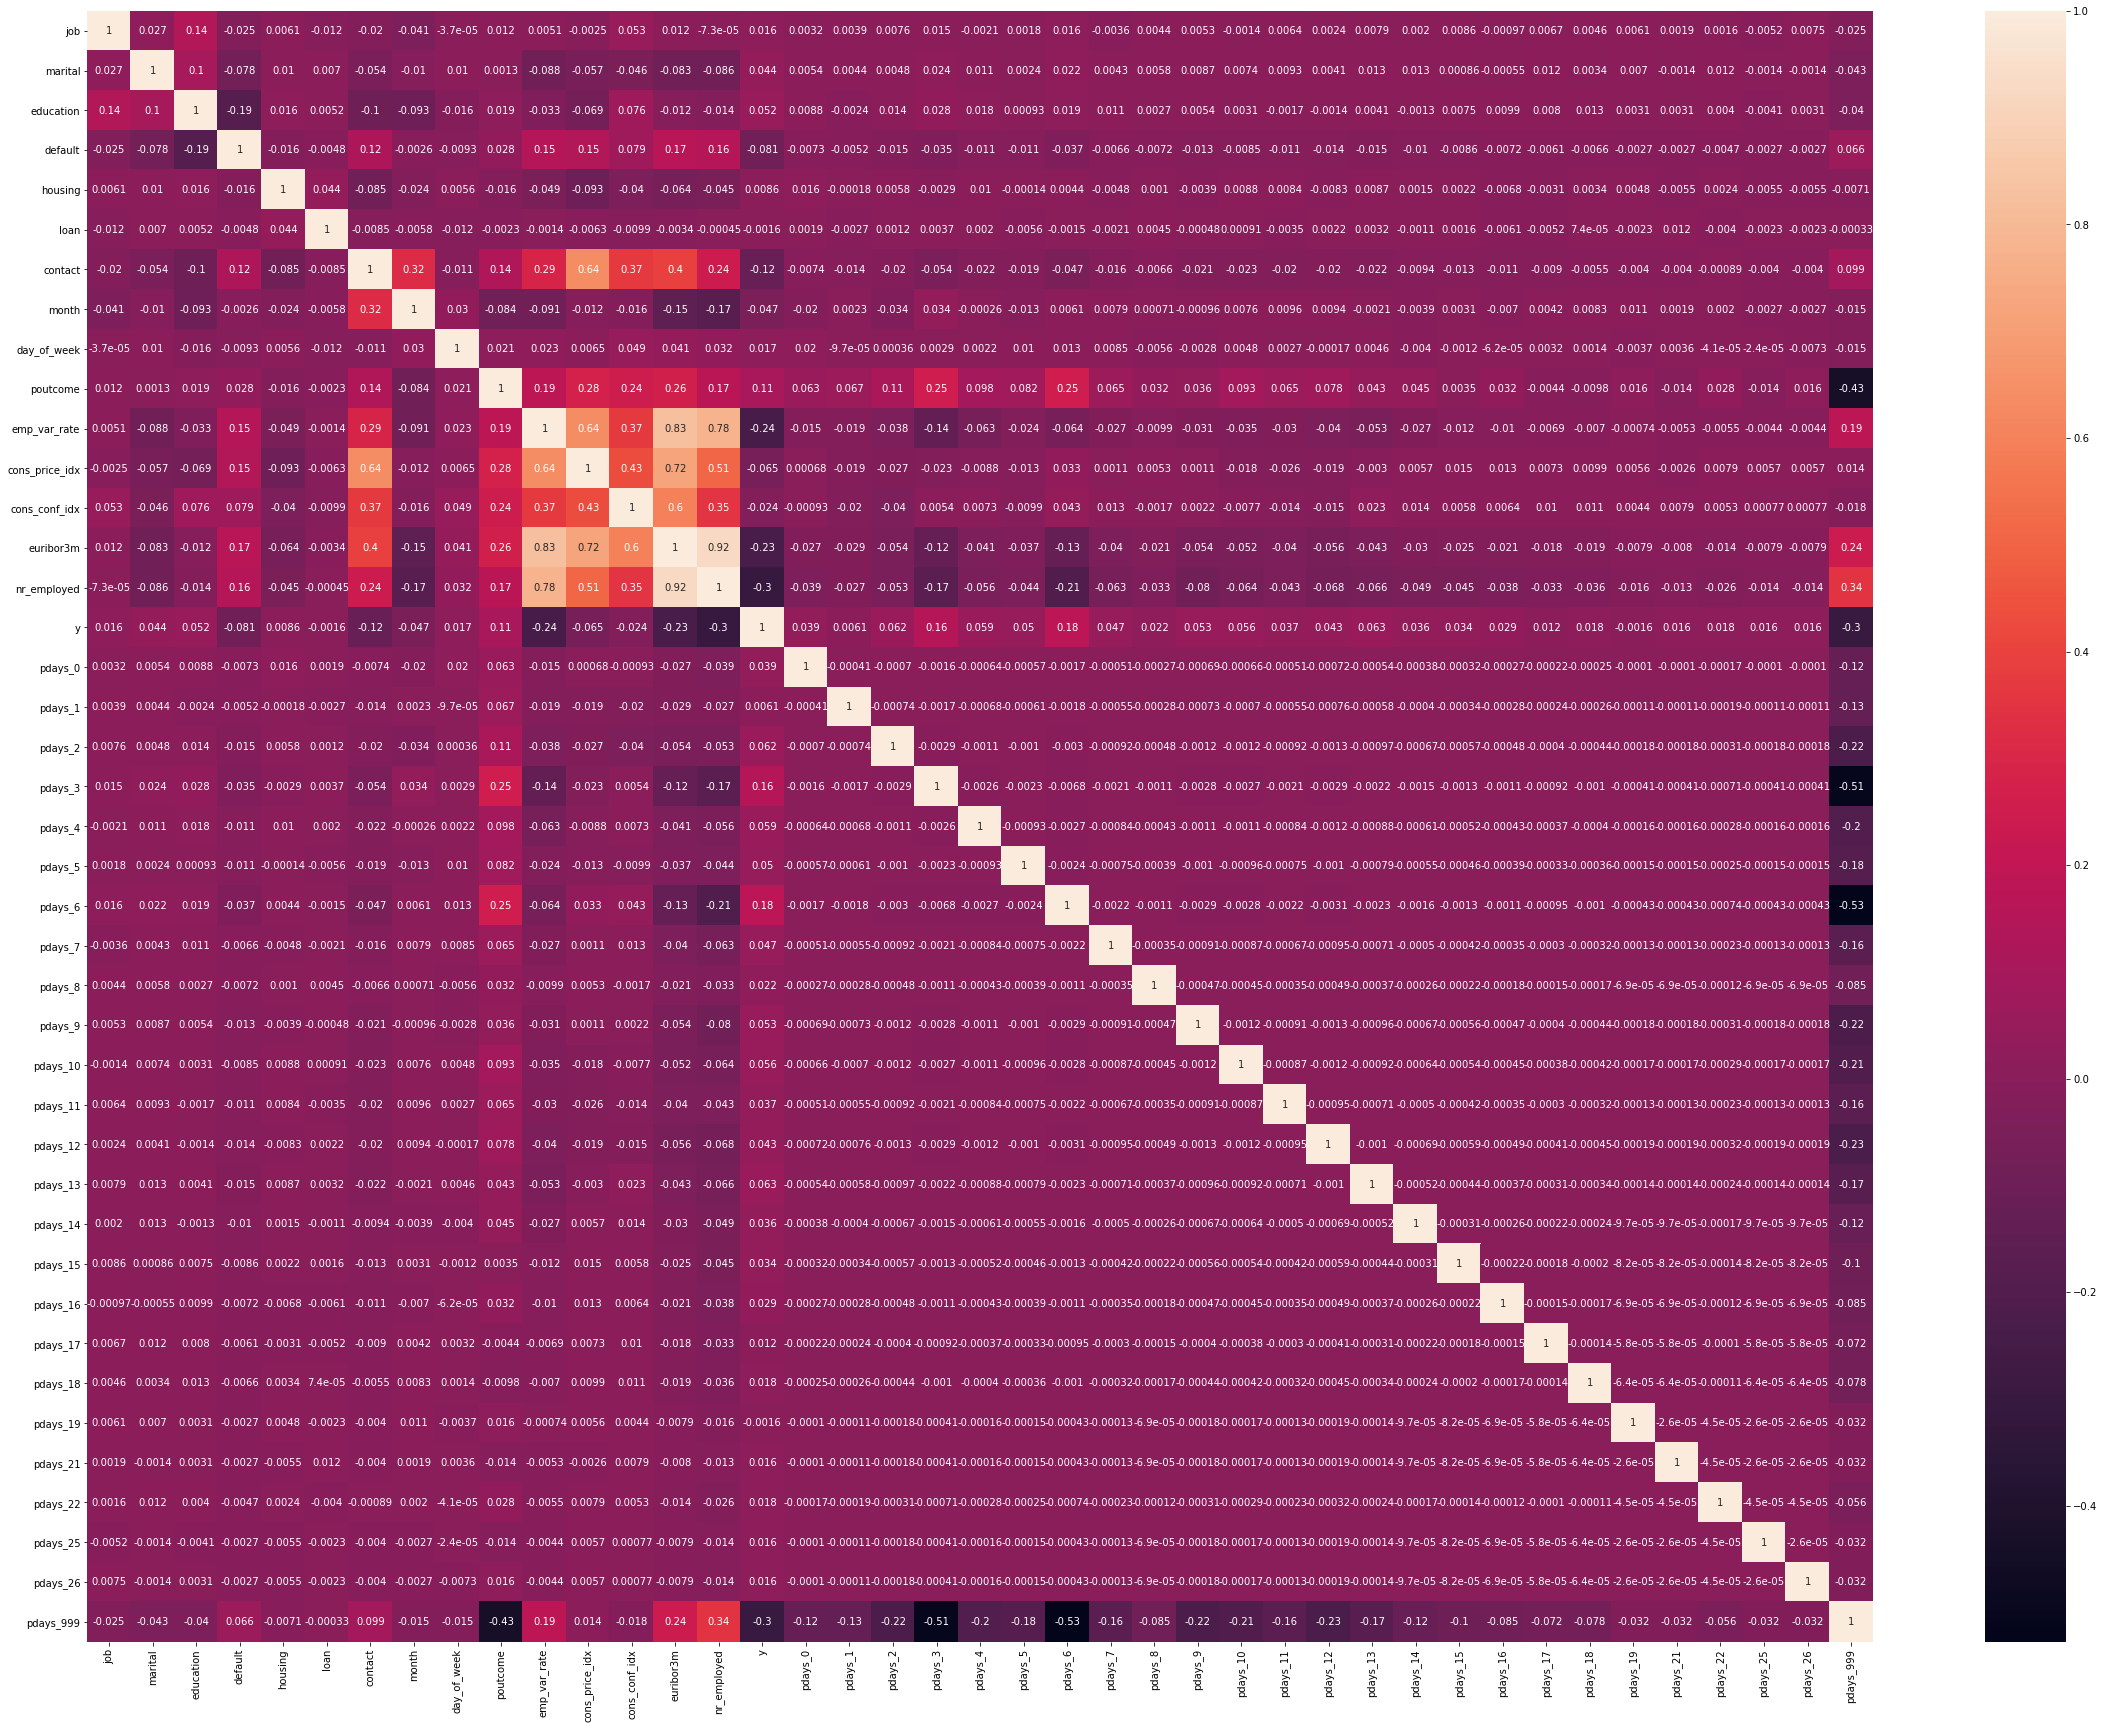

In [40]:
# Drawing the confusion matrix
plt.figure(figsize=(40,30))
sns.heatmap(final_encoded_df.corr(),annot=True)

In [41]:
final_encoded_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays_15,pdays_16,pdays_17,pdays_18,pdays_19,pdays_21,pdays_22,pdays_25,pdays_26,pdays_999
0,3.0,1,1,0,1,2,0,0,1,2,...,0,0,0,0,0,0,0,0,0,1
1,4.0,9,1,7,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,4,2,6,0,2,0,0,4,2,...,0,0,0,0,0,0,0,0,0,0
3,2.0,7,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1.0,4,0,0,0,2,0,0,3,3,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41182,0.0,0,1,3,0,2,0,0,6,2,...,0,0,0,0,0,0,0,0,0,1
41183,5.0,5,1,3,1,0,2,1,4,2,...,0,0,0,0,0,0,0,0,0,1
41184,1.0,3,1,0,1,0,0,1,6,2,...,0,0,0,0,0,0,0,0,0,1
41185,3.0,0,2,6,1,2,2,1,6,4,...,0,0,0,0,0,0,0,0,0,1


### Standarization

Some features such as "emp_var_rate", "cons_price_idx", "cons_conf_idx", "euribor3m", "nr_employed" are distributed within high value range. That makes the model hard to train. Therefore, those features need to be standardized.

In [42]:
# Standardizing "emp_var_rate","cons_price_idx","cons_conf_idx","euribor3m","nr_employed" features.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
final_scaled_df= final_encoded_df.copy()
final_scaled_df[["emp_var_rate","cons_price_idx","cons_conf_idx","euribor3m","nr_employed"]] = scaler.fit_transform(final_scaled_df[["emp_var_rate","cons_price_idx","cons_conf_idx","euribor3m","nr_employed"]])

### Split dataset

First select X as all the independent variables and y as the dependent variable. y is the class label.




In [43]:
# Defining independent and dependent variables 
X = final_scaled_df.drop(columns=['y'],axis=1)

y = final_scaled_df['y']

In [44]:
# Splitting the dataset to train and test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)

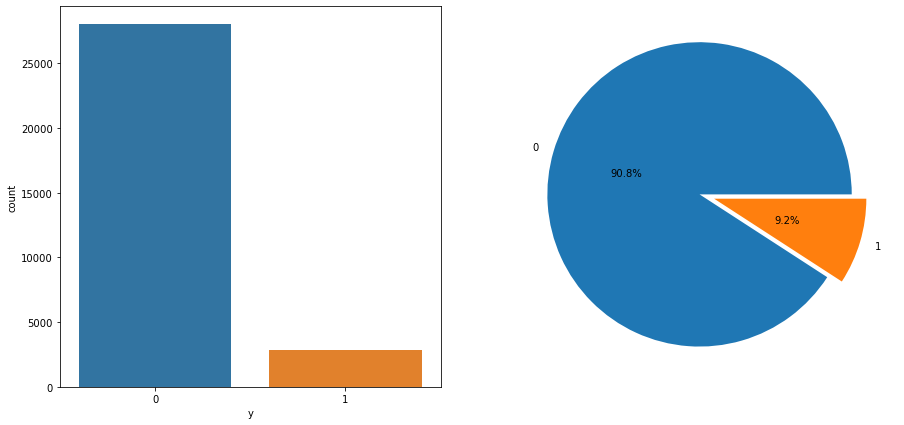

In [45]:
# Visualizin the class imbalance
plt.figure(figsize=(15,7))
plt.tight_layout(h_pad=6)

ax1=plt.subplot(1,2,1)
sns.countplot(y_train)

ax1=plt.subplot(1,2,2)
plt.pie(y_train.value_counts().values,labels=[0,1],pctdistance=0.5,explode=[0.05]*2,autopct="%.1f%%")
plt.show()

In [46]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays_15,pdays_16,pdays_17,pdays_18,pdays_19,pdays_21,pdays_22,pdays_25,pdays_26,pdays_999
21007,5.0,5,1,3,0,2,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
29251,2.0,1,1,2,1,2,0,1,4,0,...,0,0,0,0,0,0,0,0,0,1
7180,2.0,7,1,3,1,2,0,1,6,3,...,0,0,0,0,0,0,0,0,0,1
12066,3.0,1,1,1,0,2,0,1,9,2,...,0,0,0,0,0,0,0,0,0,1
11815,5.0,9,1,5,1,0,0,1,6,3,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34111,3.0,0,1,6,0,0,0,1,6,1,...,0,0,0,0,0,0,0,0,0,1
25069,2.0,9,1,5,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,1
25423,0.0,8,2,6,0,2,0,0,9,0,...,0,0,0,0,0,0,0,0,0,1
39665,3.0,9,1,5,0,0,2,1,4,1,...,0,0,0,0,0,0,0,0,0,1


In [47]:
X_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays_15,pdays_16,pdays_17,pdays_18,pdays_19,pdays_21,pdays_22,pdays_25,pdays_26,pdays_999
19616,8.0,5,1,0,0,2,0,1,5,0,...,0,0,0,0,0,0,0,0,0,1
40676,1.0,0,2,2,1,0,0,0,6,2,...,0,0,0,0,0,0,0,0,0,1
36880,2.0,9,2,6,0,0,2,0,6,3,...,0,0,0,0,0,0,0,0,0,1
28583,5.0,7,1,7,1,2,0,0,1,3,...,0,0,0,0,0,0,0,0,0,1
524,2.0,9,2,3,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24510,5.0,4,1,7,0,0,0,1,6,3,...,0,0,0,0,0,0,0,0,0,1
32551,2.0,0,1,3,0,0,0,0,3,4,...,0,0,0,0,0,0,0,0,0,1
5984,0.0,1,2,2,0,0,0,0,3,2,...,0,0,0,0,0,0,0,0,0,1
6867,5.0,1,1,0,1,0,0,1,6,0,...,0,0,0,0,0,0,0,0,0,1


### PCA

In [48]:
# Applying PCA to normalised X_train dataframe
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_train)

In [49]:
# get the variance ratio array.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([3.82678682e-01, 1.56634400e-01, 1.27972331e-01, 1.01765212e-01,
       5.80983727e-02, 5.47147580e-02, 2.83963757e-02, 2.19324552e-02,
       1.55105985e-02, 1.53641563e-02, 8.92193279e-03, 7.63416738e-03,
       5.10516897e-03, 4.67013892e-03, 4.54214412e-03, 3.08504346e-03,
       2.05837630e-03, 2.23493490e-04, 1.94730235e-04, 1.04709947e-04,
       9.47592080e-05, 3.94581513e-05, 3.64050483e-05, 3.25285652e-05,
       2.90655188e-05, 2.63976736e-05, 2.26898512e-05, 2.02253678e-05,
       1.92071068e-05, 1.58355939e-05, 1.29757234e-05, 1.15441340e-05,
       6.67721725e-06, 5.68869274e-06, 5.67331438e-06, 4.93584944e-06,
       4.73399083e-06, 1.98156018e-06, 1.02198969e-06, 9.49073442e-07,
       2.28813848e-33, 2.28813848e-33, 2.28813848e-33])

In [50]:
# function too get no of significant features to be selected from the above variance ratio array
def count_dimension(arr1):
  print(arr1)
  sum=0
  count=0
  for i in arr1:
    sum+=i
    count +=1
    if(sum>=0.95):
      return count
  return -1
    

In [51]:
print(f"No of features needed to be extracted : {count_dimension(explained_variance)}")

[3.82678682e-01 1.56634400e-01 1.27972331e-01 1.01765212e-01
 5.80983727e-02 5.47147580e-02 2.83963757e-02 2.19324552e-02
 1.55105985e-02 1.53641563e-02 8.92193279e-03 7.63416738e-03
 5.10516897e-03 4.67013892e-03 4.54214412e-03 3.08504346e-03
 2.05837630e-03 2.23493490e-04 1.94730235e-04 1.04709947e-04
 9.47592080e-05 3.94581513e-05 3.64050483e-05 3.25285652e-05
 2.90655188e-05 2.63976736e-05 2.26898512e-05 2.02253678e-05
 1.92071068e-05 1.58355939e-05 1.29757234e-05 1.15441340e-05
 6.67721725e-06 5.68869274e-06 5.67331438e-06 4.93584944e-06
 4.73399083e-06 1.98156018e-06 1.02198969e-06 9.49073442e-07
 2.28813848e-33 2.28813848e-33 2.28813848e-33]
No of features needed to be extracted : 10


In [52]:
#selecting no of features as 10 and apply PCA
pca=PCA(n_components=10)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [53]:
# training the SVM model
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C=1, gamma=0.5)
classifier.fit(X_train_pca, y_train)

SVC(C=1, gamma=0.5)

In [54]:
y_pred = classifier.predict(X_test_pca)

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6981
           1       0.51      0.08      0.14       732

    accuracy                           0.91      7713
   macro avg       0.71      0.53      0.54      7713
weighted avg       0.87      0.91      0.87      7713



In [56]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6926   55]
 [ 675   57]]


<AxesSubplot:>

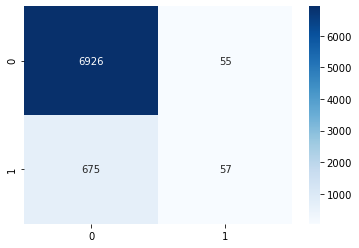

In [57]:
# Displaying the details of the confusion matrix using heatmap
sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

In [58]:
from imblearn.over_sampling import SVMSMOTE

smote = SVMSMOTE(random_state=101)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train_pca, y_train)

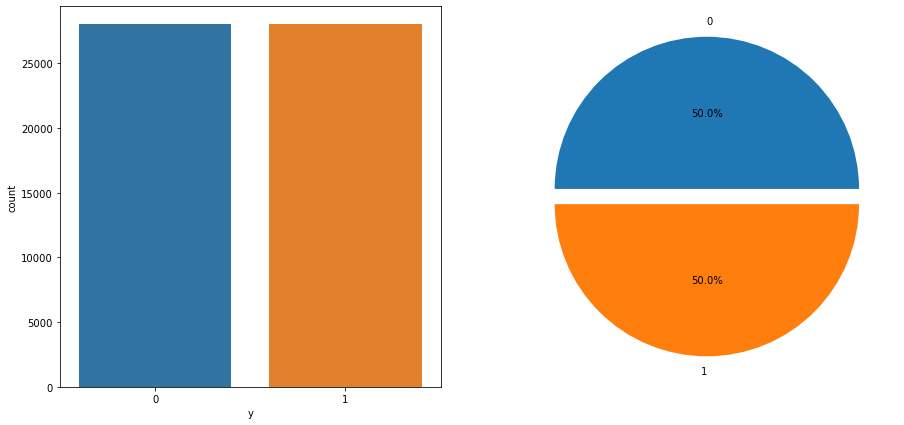

In [59]:
plt.figure(figsize=(15,7))
plt.tight_layout(h_pad=6)

ax1=plt.subplot(1,2,1)
sns.countplot(y_train_SMOTE)

ax1=plt.subplot(1,2,2)
plt.pie(pd.DataFrame(y_train_SMOTE).value_counts().values,labels=[0,1],pctdistance=0.5,explode=[0.05]*2,autopct="%.1f%%")
plt.show()

In [60]:
from sklearn.svm import SVC
classifier_SMOTE = SVC(kernel = 'rbf', C=1, gamma=0.5)
classifier_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

SVC(C=1, gamma=0.5)

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, classifier_SMOTE.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      6981
           1       0.22      0.29      0.25       732

    accuracy                           0.84      7713
   macro avg       0.57      0.59      0.58      7713
weighted avg       0.86      0.84      0.85      7713



In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_SMOTE = confusion_matrix(y_test, classifier_SMOTE.predict(X_test_pca))
print(cm_SMOTE)

[[6229  752]
 [ 517  215]]


<AxesSubplot:>

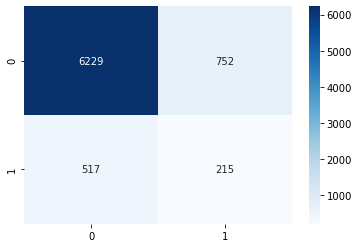

In [63]:
sns.heatmap(cm_SMOTE,annot=True,cmap='Blues', fmt='g')

Try with gamma value=50 and C=1

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      6981
           1       0.16      0.09      0.12       732

    accuracy                           0.87      7713
   macro avg       0.53      0.52      0.52      7713
weighted avg       0.84      0.87      0.85      7713



<AxesSubplot:>

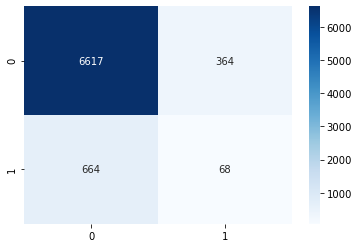

In [64]:
from sklearn.svm import SVC
classifier_SMOTE = SVC(kernel = 'rbf', C=1, gamma=50)
classifier_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

from sklearn.metrics import classification_report

print(classification_report(y_test, classifier_SMOTE.predict(X_test_pca)))

from sklearn.metrics import confusion_matrix, accuracy_score
cm_SMOTE = confusion_matrix(y_test, classifier_SMOTE.predict(X_test_pca))

sns.heatmap(cm_SMOTE,annot=True,cmap='Blues', fmt='g')